# Pymaceuticals Inc.
---

### Analysis

- Distribution between male and female was nearly equal
- The only possible outlier data was found in Infubinol (36.32)
- There is a negative correlation between tumor volume vs. time point for a single mouse treated with Capomulin
- There is a positive correlation between mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results, how="inner",on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = combined_df["Mouse ID"].unique()
m_count = len(mice)
m_count



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

gb_mouse = combined_df.groupby(["Mouse ID"])
times = gb_mouse["Timepoint"].value_counts().to_frame()

check = times.loc[times["Timepoint"] != 1,:]
duplicates = check.index[0][0]

duplicates

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_info = combined_df.loc[combined_df["Mouse ID"] == duplicates,:]
dup_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != duplicates,:]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean_df["Mouse ID"].unique()
mice_clean_count = len(mice_clean)
mice_clean_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Mean_Tumor_Volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_Volume_Std_Dev = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Err = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary DataFrame.
stats_df = pd.DataFrame(
    {
        "Mean Tumor Volume": Mean_Tumor_Volume,
        "Median Tumor Volume": Median_Tumor_Volume,
        "Tumor Volume Variance": Tumor_Volume_Variance,
        "Tumor Volume Std. Dev.": Tumor_Volume_Std_Dev,
        "Tumor Volume Std. Err.":Tumor_Volume_Std_Err
    }
)

stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
one_line = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
one_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

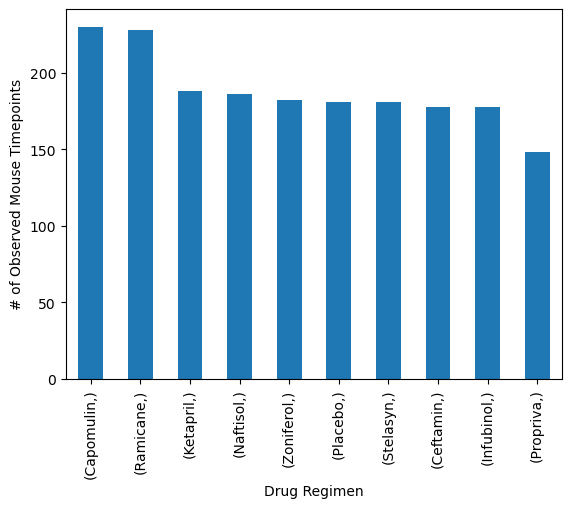

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Reduced_df = clean_df[["Drug Regimen"]].value_counts()
Reduced_df

plot = Reduced_df.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show(plot)

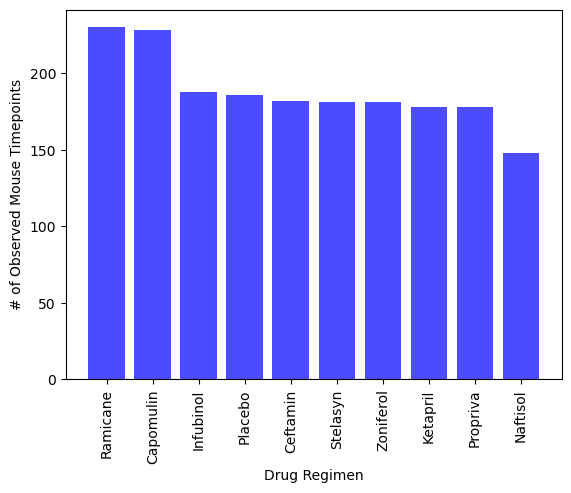

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(stats_df))
y_axis = clean_df["Drug Regimen"].value_counts()

tick_locations  = [value+0.4 for value in x_axis]

plt.bar(x_axis, y_axis, color='b', alpha=0.7, align="edge")
plt.xticks(tick_locations, clean_df["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

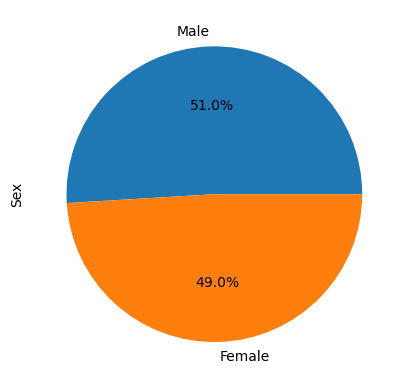

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf_df = clean_df["Sex"].value_counts()
mf_df

mf_pie = mf_df.plot(kind="pie", autopct="%1.1f%%")
plt.show(mf_pie)

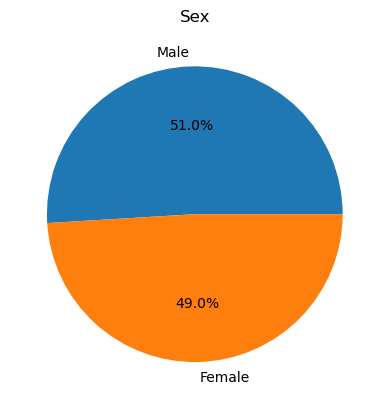

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df["Sex"].value_counts(), labels = clean_df["Sex"].unique(), autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
  
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane"]

Infubinol_df = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol"]

Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
max_t_Capo = Capomulin_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()
max_t_Ram = Ramicane_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()
max_t_Inf = Infubinol_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()
max_t_Cef = Ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max().to_frame()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_t_Capo = pd.merge(clean_df,max_t_Capo, on=["Mouse ID", "Timepoint"],)
last_t_Ram = pd.merge(clean_df,max_t_Ram, on=["Mouse ID", "Timepoint"],)
last_t_Inf = pd.merge(clean_df,max_t_Inf, on=["Mouse ID", "Timepoint"],)
last_t_Cef = pd.merge(clean_df,max_t_Cef, on=["Mouse ID", "Timepoint"],)

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_Capo = [x for x in last_t_Capo["Tumor Volume (mm3)"]]
tumor_vol_Ram = [x for x in last_t_Ram["Tumor Volume (mm3)"]]
tumor_vol_Inf = [x for x in last_t_Inf["Tumor Volume (mm3)"]]
tumor_vol_Cef = [x for x in last_t_Cef["Tumor Volume (mm3)"]]

# dictionary of Drug Regimen and tumor volume
tum_dict = {"Capomulin":tumor_vol_Capo,
            "Ramicane":tumor_vol_Ram,
            "Infubinol":tumor_vol_Inf,
            "Ceftamin":tumor_vol_Cef}

# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_Capo = np.quantile(tumor_vol_Capo,[.25,.5,.75])
quartiles_Ram = np.quantile(tumor_vol_Ram,[.25,.5,.75])
quartiles_Inf = np.quantile(tumor_vol_Inf,[.25,.5,.75])
quartiles_Cef = np.quantile(tumor_vol_Cef,[.25,.5,.75])

# Capomulin statistical calculations
lowerq = quartiles_Capo[0]
upperq = quartiles_Capo[2]
iqr_Capo = upperq-lowerq
lower_bound_Capo = lowerq - (1.5*iqr_Capo)
upper_bound_Capo = upperq + (1.5*iqr_Capo)

# Ramicane statistical calculations
lowerq = quartiles_Ram[0]
upperq = quartiles_Ram[2]
iqr_Ram = upperq-lowerq
lower_bound_Ram = lowerq - (1.5*iqr_Ram)
upper_bound_Ram = upperq + (1.5*iqr_Ram)

# Infubinol statistical calculations
lowerq = quartiles_Inf[0]
upperq = quartiles_Inf[2]
iqr_Inf = upperq-lowerq
lower_bound_Inf = lowerq - (1.5*iqr_Inf)
upper_bound_Inf = upperq + (1.5*iqr_Inf)

# Ceftamin statistical calculations
lowerq = quartiles_Cef[0]
upperq = quartiles_Cef[2]
iqr_Cef = upperq-lowerq
lower_bound_Cef = lowerq - (1.5*iqr_Cef)
upper_bound_Cef = upperq + (1.5*iqr_Cef)

# Lists that will store outliers
Capo_out = []
Ram_out = []
Inf_out = []
Cef_out = []

# Check Capomulin for outliers
for data in tumor_vol_Capo:
    if data < lower_bound_Capo:
        Capo_out.append(data)

# Check Ramicane for outliers
for data in tumor_vol_Ram:
    if data < lower_bound_Ram:
        Ram_out.append(data)

# Check Infubinol for outliers
for data in tumor_vol_Inf:
    if data < lower_bound_Inf:
        Inf_out.append(data)

# Check Ceftamin for outliers
for data in tumor_vol_Cef:
    if data < lower_bound_Cef:
        Cef_out.append(data)

# Print outliers
print(f"Capomulin's potential outliers: {Capo_out}")
print(f"Ramicane's potential outliers: {Ram_out}")
print(f"Infubinol's potential outliers: {Inf_out}")
print(f"Ceftamin's potential outliers: {Cef_out}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


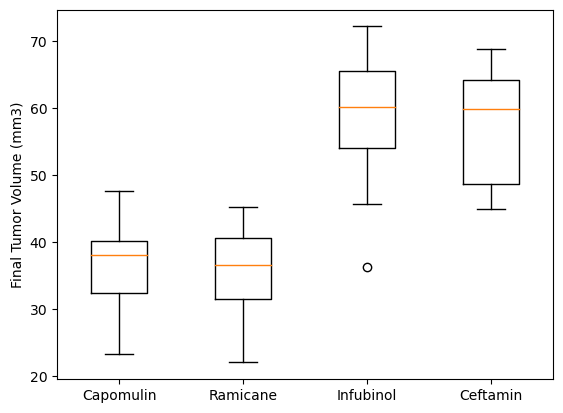

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tum_dict.values())
ax.set_xticklabels(tum_dict.keys())
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

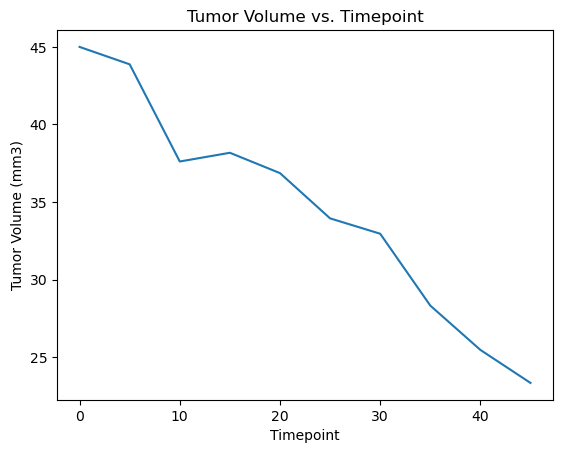

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
s185_df = clean_df.loc[clean_df["Mouse ID"] == "s185"]

# axis lists of values from data frame
x_axis = [x for x in s185_df["Timepoint"]]
y_axis = [x for x in s185_df["Tumor Volume (mm3)"]]

# formatting
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Timepoint")

plt.plot(x_axis, y_axis)

plt.show()

C:\Users\meek\AppData\Local\Temp\ipykernel_3828\4034018031.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()


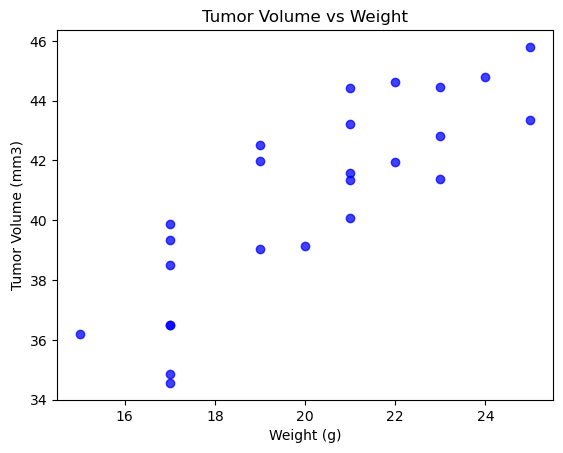

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()

# axis lists of values from data frame
y_axis = [x for x in Cap_df["Tumor Volume (mm3)"]]
x_axis = [x for x in Cap_df["Weight (g)"]]

# formatting
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Tumor Volume vs Weight")

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.75)

plt.show()

## Correlation and Regression

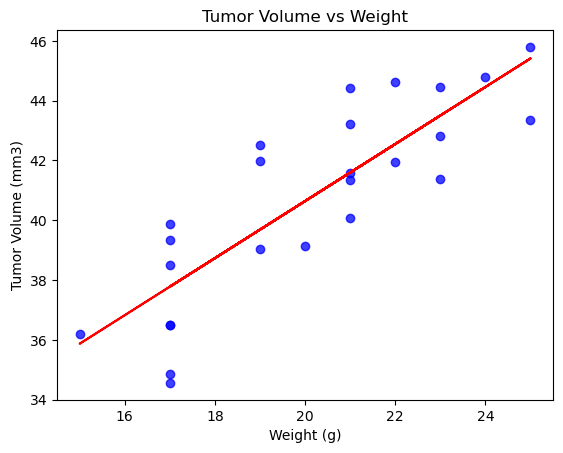

The correlation between mouse weight and the average tumor volume is 0.84


In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
y_axis = [x for x in Cap_df["Tumor Volume (mm3)"]]
x_axis = [x for x in Cap_df["Weight (g)"]]

# Formatting
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Tumor Volume vs Weight")

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", alpha=0.75)

# use lingress to access key metrics
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

# calculate y values for regression line
y_line = [(x*slope+intercept) for x in x_axis]

# plot regression line
plt.plot(x_axis,y_line,"r-")

plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")